In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Funkcja aktywacji, w naszym przypadku używamy funkcji sigmoidalnej

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
#korzystam z biblioteki np, aby x mogl byc wektorem

Klasa zawierająca funkcję do predykcji

In [3]:
class MLP:
    def __init__(self, weights, activation_function):
        self.weights = weights
        self.activation_function = activation_function
        
    def predict(self, inp):
        v = inp
        for weight in self.weights:
            v = np.c_[v, np.ones(v.shape[0])] 
            prediction = v @ weight
            v = self.activation_function(prediction)
        return prediction
        

Pierwszy zbiór

In [4]:
train_df = pd.read_csv('mio1/regression/square-simple-training.csv', index_col=0)
test_df = pd.read_csv('mio1/regression/square-simple-test.csv', index_col=0)

Sieć z jedną warstwą i 5 neuronami

In [5]:
wagi = [np.array([[2, 1, -1, -1, -1],
                  [1, 1, 1, 1, 1]]),
       np.array([-700, -100, -50, -800, -300, 1300])]
#kazdy np.array to jedna warstwa, ostatni to współczynniki do wyjścia
model1 = MLP(wagi, sigmoid)
prediction1 = model1.predict(train_df['x'])
metrics.mean_absolute_error(train_df['y'], prediction1)

26.052701103447333

In [6]:
model2 = MLP(wagi, sigmoid)
prediction2 = model2.predict(test_df['x'])
metrics.mean_absolute_error(test_df['y'], prediction2)

35.05551171885537

In [7]:
model_df = pd.DataFrame(test_df['x'])
model_df['split'] = 'predict'
model_df['y'] = prediction2
test_df['split'] = 'test'
df = pd.concat([test_df, model_df])

<AxesSubplot:xlabel='x', ylabel='y'>

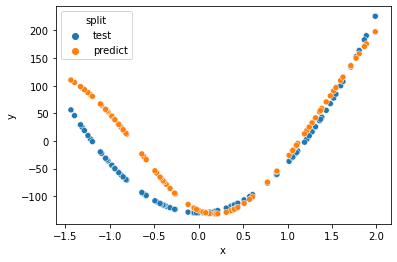

In [8]:
sns.scatterplot(data=df, x='x', y='y', hue = 'split')

MAE na zbiorze treningowym jest niższy niż na testowym, więc wszystko ok.

Sieć z jedną warstwą i 10 neuronami

In [9]:
wagi = [np.array([[2, 1, -1, -1, -1, 100, 1, 1, 1, 1],
                  [1, 1, 1, 1, 10, 1 , 1, 1 , 1, 1]]),
       np.array([-700, -100, -50, -800, -300, 100 , 1, 1 , 100, 1, 1300])]
#kazdy np.array to jedna warstwa, ostatni to współczynniki do wyjścia
model1 = MLP(wagi, sigmoid)
prediction1 = model1.predict(train_df['x'])
metrics.mean_absolute_error(train_df['y'], prediction1)

54.76018909021286

In [10]:
model2 = MLP(wagi, sigmoid)
prediction2 = model2.predict(test_df['x'])
metrics.mean_absolute_error(test_df['y'], prediction2)

62.129094858394545

In [11]:
model_df = pd.DataFrame(test_df['x'])
model_df['split'] = 'predict'
model_df['y'] = prediction2
test_df['split'] = 'test'
df = pd.concat([test_df, model_df])

<AxesSubplot:xlabel='x', ylabel='y'>

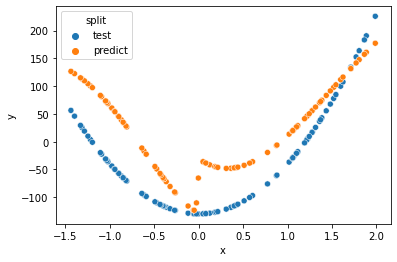

In [12]:
sns.scatterplot(data=df, x='x', y='y', hue = 'split')

Sieć z dwoma warstwami po 5 neuronów

In [13]:
wagi = [np.array([[2, 1, -1, -1, -1],
                  [1, 1, 1, 1, 10]]),
        np.array([[2, 1, -1, -1, -1],
                  [10, 1, 1, 1, 10],
                  [10, 1, 1, 1, 10],
                  [10, 1, 1, 1, 10],
                  [10, 1, 1, 1, 10],
                 [1, 1, 1, 1, 10]]),
       np.array([-100, -100, -150, -800, -300,1300])]
#kazdy np.array to jedna warstwa, ostatni to współczynniki do wyjścia
model1 = MLP(wagi, sigmoid)
prediction1 = model1.predict(train_df['x'])
metrics.mean_absolute_error(train_df['y'], prediction1)

82.57111612422206

In [14]:
model2 = MLP(wagi, sigmoid)
prediction2 = model2.predict(test_df['x'])
metrics.mean_absolute_error(test_df['y'], prediction2)

78.86030179440534

In [15]:
model_df = pd.DataFrame(test_df['x'])
model_df['split'] = 'predict'
model_df['y'] = prediction2
test_df['split'] = 'test'
df = pd.concat([test_df, model_df])

<AxesSubplot:xlabel='x', ylabel='y'>

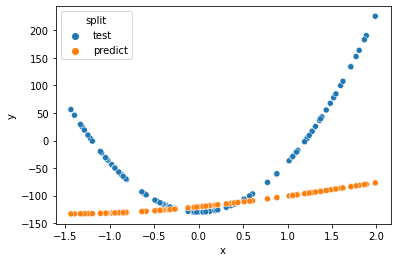

In [16]:
sns.scatterplot(data=df, x='x', y='y', hue = 'split')

Oczywiście model jest źle dopasowany (estymujemy krzywą prostą liniową) jednak to zadanie jest tak katorżnicze do wykonania ręcznie, że zdecydowałem się tylko zasygnalizować jak wyglądałyby wagi.

# Drugi zbiór

In [17]:
train_df = pd.read_csv('mio1/regression/steps-large-training.csv', index_col=0)
test_df = pd.read_csv('mio1/regression/steps-large-test.csv', index_col=0)

Sieć z jedną warstwą i 5 neuronami

In [21]:
wagi = [np.array([[50, 180, 180, 150, 450],
                  [450, -100, 100, -115, 150]]), 
        np.array([100, 80, 80, 100, 0, -180])]
#kazdy np.array to jedna warstwa, ostatni to współczynniki do wyjścia
model1 = MLP(wagi, sigmoid)
prediction1 = model1.predict(train_df['x'])
metrics.mean_absolute_error(train_df['y'], prediction1)

26.752308689779717

In [22]:
model2 = MLP(wagi, sigmoid)
prediction2 = model2.predict(test_df['x'])
metrics.mean_absolute_error(test_df['y'], prediction2)

26.59941738628309

In [23]:
model_df = pd.DataFrame(test_df['x'])
model_df['split'] = 'predict'
model_df['y'] = prediction2
test_df['split'] = 'test'
df = pd.concat([test_df, model_df])

<AxesSubplot:xlabel='x', ylabel='y'>

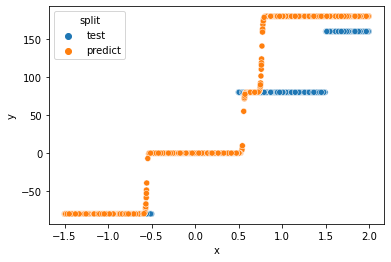

In [24]:
sns.scatterplot(data=df, x='x', y='y', hue = 'split')

Niestety, mimo wielu prób nie udało mi się ustawić odpowiednio ostatnich dwóch schodków

Dla 1 warstwy i 10 neuronów oraz dla 2 warstw po 5 neuronów ustawianie byłoby jeszcze cięższe, więc pominąłem ten punkt (wagi byłyby analogicznie skonstuowane jak w pierwszym zbiorze).